In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### PREMIER LEAGUE 2023-24

In [59]:
url = "https://fbref.com/en/comps/9/Premier-League-Stats"
page = requests.get(url)

In [60]:
soup = BeautifulSoup(page.content, "html.parser")

In [61]:
table = soup.find("table", {"class": "stats_table"})

In [62]:
headers = table.find_all("th")
column_names = [header.get_text(strip=True) for header in headers]
print(column_names)

['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']


In [63]:
rows = table.find_all("tr")
data = []
for row in rows:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    if row_data:
        data.append(row_data)

In [64]:
data = pd.DataFrame(data, columns=column_names[1:20])
data.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,Arsenal,18,12,4,2,36,16,+20,40,2.22,32.0,13.7,+18.3,+1.02,W W L W D,"60,159","Eddie Nketiah, Bukayo Saka - 5",David Raya,
1,Liverpool,18,11,6,1,37,16,+21,39,2.17,35.4,21.2,+14.2,+0.79,W W W D D,"52,079",Mohamed Salah - 12,Alisson,
2,Aston Villa,18,12,3,3,38,22,+16,39,2.17,31.1,23.3,+7.8,+0.43,D W W W D,"32,187",Ollie Watkins - 9,Emiliano Martínez,
3,Tottenham,18,11,3,4,37,24,+13,36,2.00,30.5,29.9,+0.7,+0.04,D L W W W,"61,606",Son Heung-min - 11,Guglielmo Vicario,
4,Manchester City,17,10,4,3,40,20,+20,34,2.00,32.2,16.5,+15.6,+0.92,D D L W D,"46,643",Erling Haaland - 14,Ederson,


In [65]:
data[["MP","W","D","L","GF","GA","GD","Pts","Pts/MP","xG","xGA","xGD","xGD/90"]] = data[["MP","W","D","L","GF","GA","GD","Pts","Pts/MP","xG","xGA","xGD","xGD/90"]].astype('float')

In [66]:
data.Squad

0             Arsenal
1           Liverpool
2         Aston Villa
3           Tottenham
4     Manchester City
5            West Ham
6       Newcastle Utd
7      Manchester Utd
8            Brighton
9             Chelsea
10             Wolves
11        Bournemouth
12             Fulham
13          Brentford
14     Crystal Palace
15            Everton
16    Nott'ham Forest
17         Luton Town
18            Burnley
19      Sheffield Utd
Name: Squad, dtype: object

[Text(0, 0, '36'),
 Text(0, 0, '31'),
 Text(0, 0, '40'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '36')]

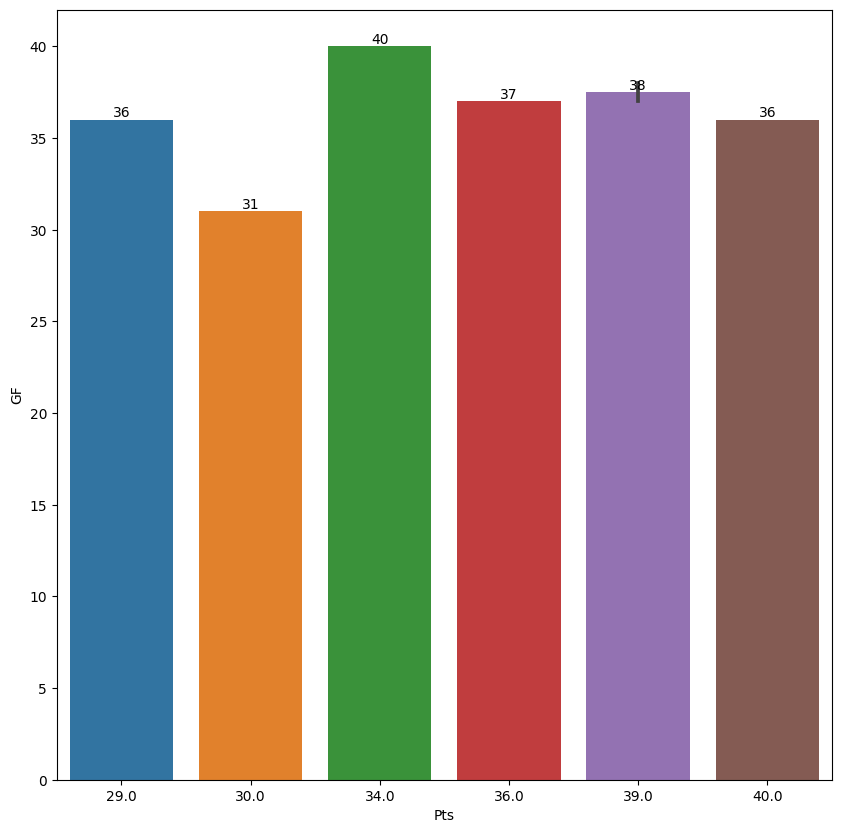

In [67]:
#GF vs Pts
plt.subplots(figsize=(10,10))
ax = sns.barplot(y="GF",x="Pts",data=data[:7])
ax.bar_label(ax.containers[0], fmt='%.0f')

[Text(0, 0, '22'),
 Text(0, 0, '30'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '19'),
 Text(0, 0, '16')]

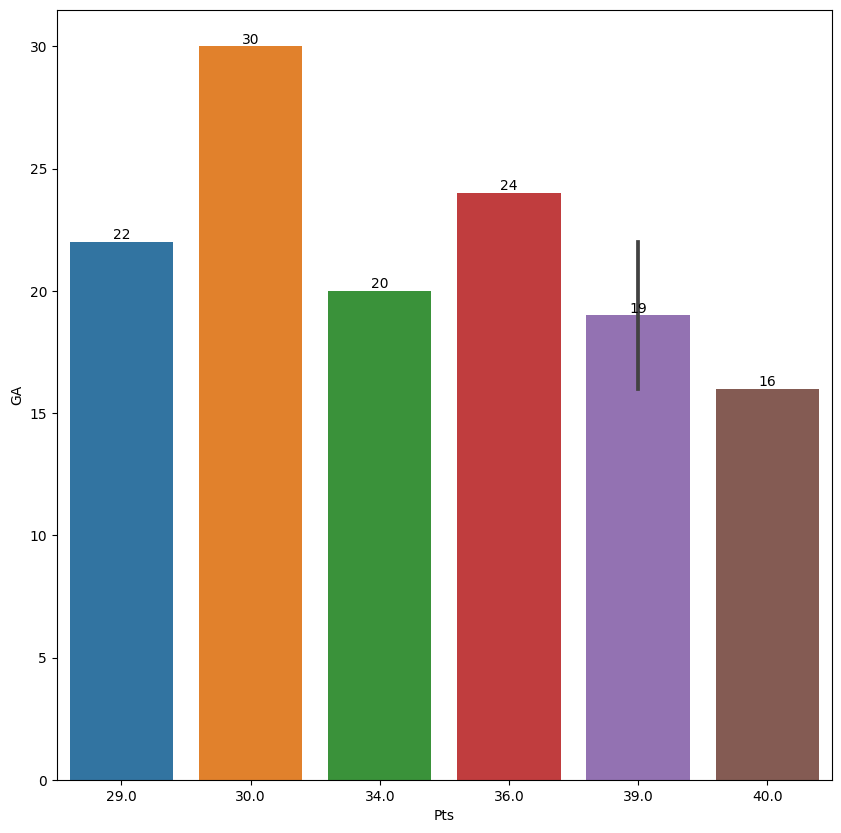

In [68]:
#GA vs Pts
plt.subplots(figsize=(10,10))
ax = sns.barplot(y="GA",x="Pts",data=data[:7])
ax.bar_label(ax.containers[0], fmt='%.0f')

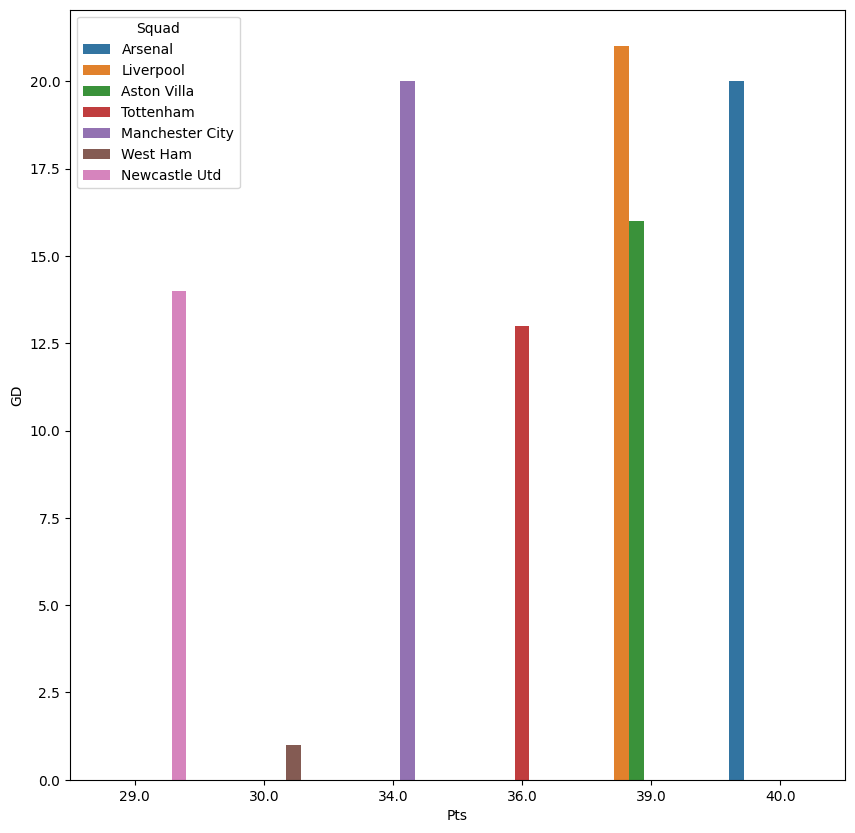

In [76]:
#GD vs Pts
plt.subplots(figsize=(10,10))
ax = sns.barplot(y="GD",x="Pts",data=data[:7],hue="Squad")
# ax.bar_label(ax.containers[0], fmt='%.0f')

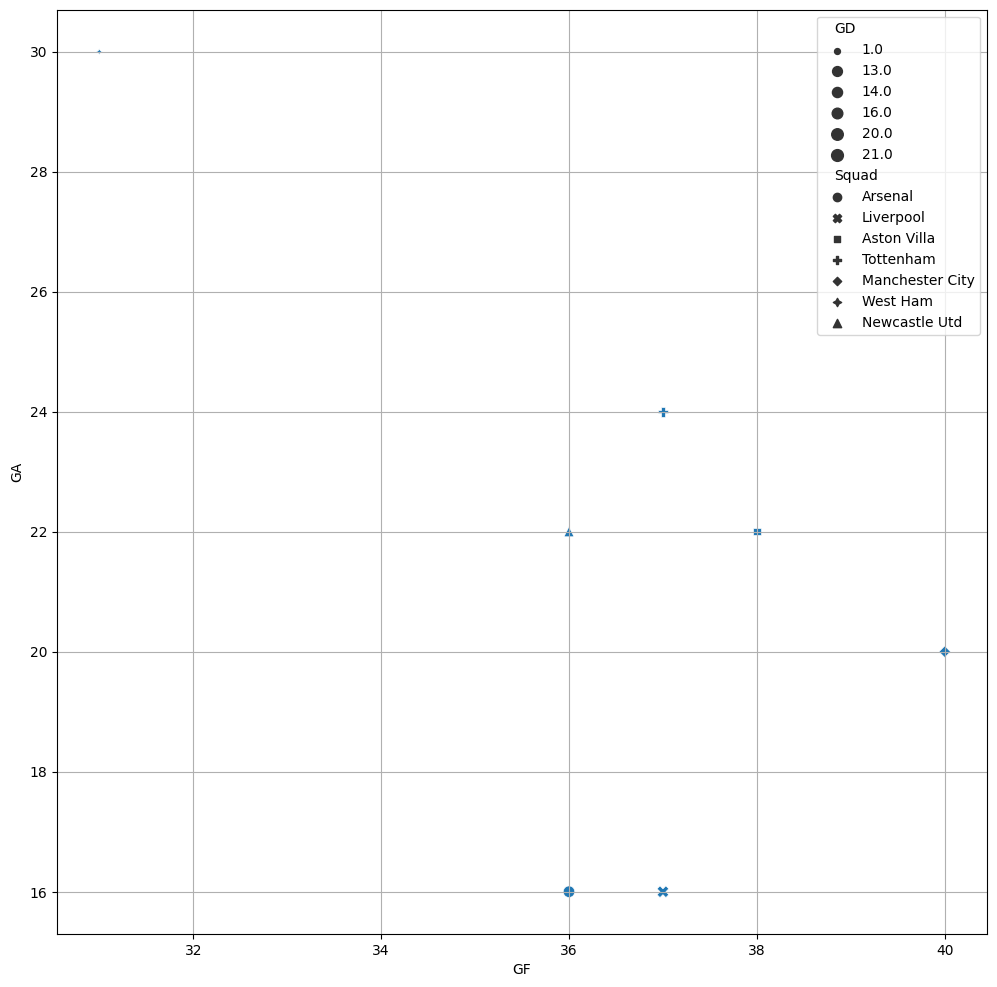

In [77]:
#barplot
plt.subplots(figsize=(12,12))
sns.scatterplot(data=data[:7], x="GF", y="GA",style="Squad", size="GD")
plt.grid()

### MANCHESTER UNITED 2013-14 TO 2022-23

In [78]:
url = "https://fbref.com/en/squads/19538871/history/Manchester-United-Stats-and-History"
result = requests.get(url)

In [79]:
soup = BeautifulSoup(result.content, 'html.parser')

In [80]:
table = soup.find("table", {"id": "comps_fa_club_league"})

In [84]:
headers = table.find_all("th")
column_names = [header.get_text(strip=True) for header in headers]
print(column_names)

['Season', 'Squad', 'Country', 'Comp', 'LgRank', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', '2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010', '2008-2009', '2007-2008', '2006-2007', '2005-2006', '2004-2005', '2003-2004', '2002-2003', '2001-2002', '2000-2001', '1999-2000', '1998-1999', '1997-1998', '1996-1997', '1995-1996', '1994-1995', '1993-1994', '1992-1993', '1991-1992', '1990-1991', '1989-1990', '1988-1989', '1987-1988', '1986-1987', '1985-1986', '1984-1985', '1983-1984', '1982-1983', '1981-1982', '1980-1981', '1979-1980', '1978-1979', '1977-1978', '1976-1977', '1975-1976', '', '1973-1974', '1972-1973', '1971-1972', '1970-1971', '1969-1970', '1968-1969', '1967-1968', '1966-1967', '1965-1966', '1964-1965', '1963-1964', '1962-1963', '1961-1962', '1960-1961', '1959-1960', '1958-1959', 

In [85]:
rows = table.find_all("tr",limit=11)
data = []
for row in rows:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    if row_data:
        data.append(row_data)

In [86]:
df = pd.DataFrame(data, columns=column_names[1:17])
df.insert(loc=0,column= "Season", value=column_names[17:27])
df

,Season,Squad,Country,Comp,LgRank,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2023-2024,Manchester Utd,eng ENG,1. Premier League,8th,18,9,1,8,18,23,-5,28,"73,507",Scott McTominay - 5,André Onana,
1,2022-2023,Manchester Utd,eng ENG,1. Premier League,3rd,38,23,6,9,58,43,+15,75,"73,671",Marcus Rashford - 17,David de Gea,→ Champions League via league finish
2,2021-2022,Manchester Utd,eng ENG,1. Premier League,6th,38,16,10,12,57,57,0,58,"73,150",Cristiano Ronaldo - 18,David de Gea,→ Europa League via league finish
3,2020-2021,Manchester Utd,eng ENG,1. Premier League,2nd,38,21,11,6,73,44,+29,74,526,Bruno Fernandes - 18,David de Gea,→ Champions League via league finish
4,2019-2020,Manchester Utd,eng ENG,1. Premier League,3rd,38,18,12,8,66,36,+30,66,"57,415","Anthony Martial, Marcus Rashford - 17",David de Gea,→ Champions League via league finish
5,2018-2019,Manchester Utd,eng ENG,1. Premier League,6th,38,19,9,10,65,54,+11,66,"74,498",Paul Pogba - 13,David de Gea,→ Europa League via league finish
6,2017-2018,Manchester Utd,eng ENG,1. Premier League,2nd,38,25,6,7,68,28,+40,81,"74,976",Romelu Lukaku - 16,David de Gea,→ Champions League via league finish
7,2016-2017,Manchester Utd,eng ENG,1. Premier League,6th,38,18,15,5,54,29,+25,69,"75,290",Zlatan Ibrahimović - 17,David de Gea,→ Champions League via Europa League win
8,2015-2016,Manchester Utd,eng ENG,1. Premier League,5th,38,19,9,10,49,35,+14,66,"75,286",Anthony Martial - 11,David de Gea,→ Europa League via cup win
9,2014-2015,Manchester Utd,eng ENG,1. Premier League,4th,38,20,10,8,62,37,+25,70,"75,335",Wayne Rooney - 12,David de Gea,→ Champions League via league finish


In [87]:
df[["MP","W","D","L","GF","GA","GD","Pts"]] = df[["MP","W","D","L","GF","GA","GD","Pts"]].astype('float')

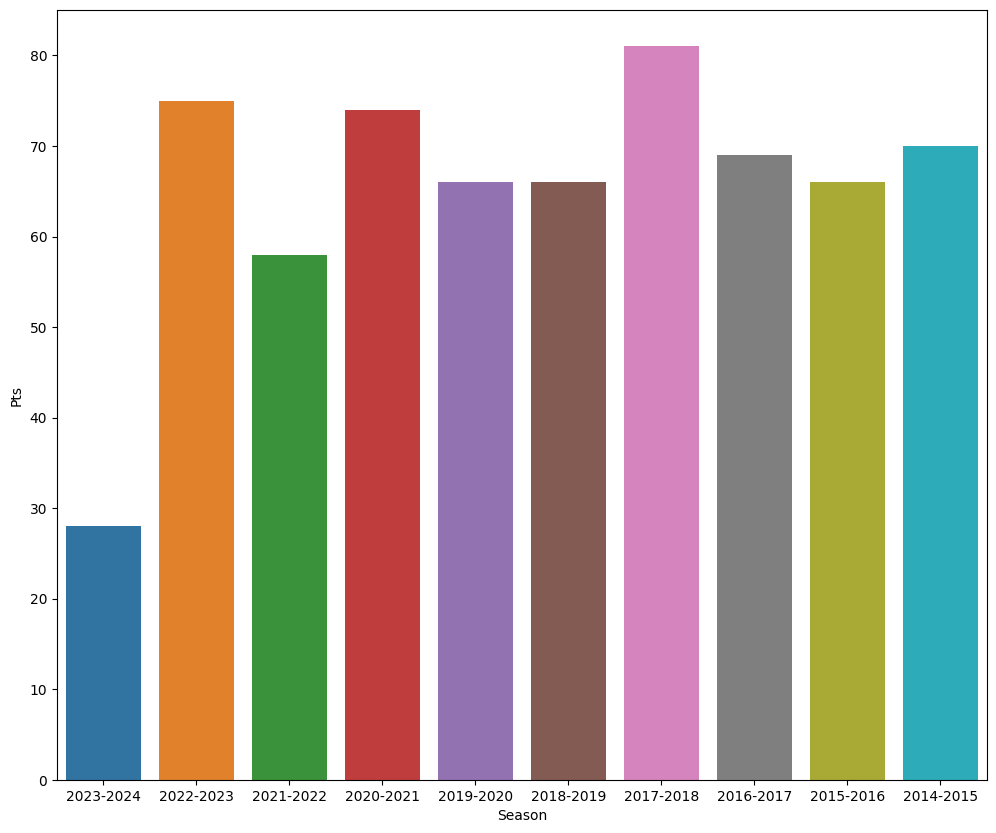

In [88]:
plt.subplots(figsize=(12,10))
ax = sns.barplot(x="Season", y="Pts", data=df)

### PLAYERS

In [89]:
url = "https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&dom_lg=1&player_id1=819b3158&p1yrfrom=2022-2023&player_id2=6025fab1&p2yrfrom=2022-2023&player_id3=0d9b2d31&p3yrfrom=2022-2023"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [90]:
table = soup.find("table",{"id":"passing_stats"})
# table

In [91]:
table1 = pd.read_html(url, match="Passing")
table1[0].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     İlkay Gündoğan            2022-23             de GER                 MF   
1        Luka Modrić            2022-23             hr CRO                 MF   
2              Pedri            2022-23             es ESP                 MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Total                      ...  Long  \
               Squad                90s   Cmp   Att  Cmp% TotDist  ...  Cmp%   
0    Manchester City               26.1  1374  1578  87.1   21396  ...  76.2   
1        Real Madrid               19.4  1336  1521  87.8   20964  ...  70.9   
2          Barcelona               22.0  1251  1449  86.3   22516  ...  82.8   

  Unnamed: 20_level_0 Unnamed: 21_level_0 Expected       Unnamed: 24_level_0  \
                  Ast                 xAG       xA A-xAG                  KP   
0                   4                 3.3      4.4   0.7                  37   
1                   3                 4.5      4.2  -1.5                  42   
2                   1                 5.0      5.3  -4.0                  42   

  Unnamed: 25_level_0 Unnamed: 26_level_0 Unnamed: 27_level_0  \
                  1/3                 PPA               CrsPA   
0                 143                  35                   1   
1                 153                  22                   3   
2                 161                  30                   2   

  Unnamed: 28_level_0  
                 PrgP  
0                 170  
1                 182  
2                 184  

[3 rows x 29 columns]

In [92]:
df = table1[0]
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     İlkay Gündoğan            2022-23             de GER                 MF   
1        Luka Modrić            2022-23             hr CRO                 MF   
2              Pedri            2022-23             es ESP                 MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Total                      ...  Long  \
               Squad                90s   Cmp   Att  Cmp% TotDist  ...  Cmp%   
0    Manchester City               26.1  1374  1578  87.1   21396  ...  76.2   
1        Real Madrid               19.4  1336  1521  87.8   20964  ...  70.9   
2          Barcelona               22.0  1251  1449  86.3   22516  ...  82.8   

  Unnamed: 20_level_0 Unnamed: 21_level_0 Expected       Unnamed: 24_level_0  \
                  Ast                 xAG       xA A-xAG                  KP   
0                   4                 3.3      4.4   0.7                  37   
1                   3                 4.5      4.2  -1.5                  42   
2                   1                 5.0      5.3  -4.0                  42   

  Unnamed: 25_level_0 Unnamed: 26_level_0 Unnamed: 27_level_0  \
                  1/3                 PPA               CrsPA   
0                 143                  35                   1   
1                 153                  22                   3   
2                 161                  30                   2   

  Unnamed: 28_level_0  
                 PrgP  
0                 170  
1                 182  
2                 184  

[3 rows x 29 columns]

In [93]:
df["Total"]["TotDist"]

0    21396
1    20964
2    22516
Name: TotDist, dtype: int64

In [94]:
df.dtypes

Unnamed: 0_level_0   Player      object
Unnamed: 1_level_0   Span        object
Unnamed: 2_level_0   Nation      object
Unnamed: 3_level_0   Pos         object
Unnamed: 4_level_0   Squad       object
Unnamed: 5_level_0   90s        float64
Total                Cmp          int64
                     Att          int64
                     Cmp%       float64
                     TotDist      int64
                     PrgDist      int64
Short                Cmp          int64
                     Att          int64
                     Cmp%       float64
Medium               Cmp          int64
                     Att          int64
                     Cmp%       float64
Long                 Cmp          int64
                     Att          int64
                     Cmp%       float64
Unnamed: 20_level_0  Ast          int64
Unnamed: 21_level_0  xAG        float64
Expected             xA         float64
                     A-xAG      float64
Unnamed: 24_level_0  KP           int64


Passing

In [95]:
import plotly.graph_objects as go
categories = ["Short Passes Completion %","Medium Passes Completion %","Long Passes Completion %",]
fig = go.Figure()
#Gundogan
fig.add_trace(go.Scatterpolar(
      r=[df.loc[0].iat[13],df.loc[0].iat[16],df.loc[0].iat[19]],
      # r=[91.1,90.6,76.2],
      theta=categories,
      fill='toself',
      name=df.loc[0].iat[0]
))
#Modric
fig.add_trace(go.Scatterpolar(
      r=[df.loc[1].iat[13],df.loc[1].iat[16],df.loc[1].iat[19]],
      theta=categories,
      fill='toself',
      name=df.loc[1].iat[0]
))
#Pedri
fig.add_trace(go.Scatterpolar(
      r=[df.loc[2].iat[13],df.loc[2].iat[16],df.loc[2].iat[19]],
      theta=categories,
      fill='toself',
      name=df.loc[2].iat[0]
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[70, 100]
    )),
  showlegend=False
)

fig.show()

In [96]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     İlkay Gündoğan            2022-23             de GER                 MF   
1        Luka Modrić            2022-23             hr CRO                 MF   
2              Pedri            2022-23             es ESP                 MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Total                      ...  Long  \
               Squad                90s   Cmp   Att  Cmp% TotDist  ...  Cmp%   
0    Manchester City               26.1  1374  1578  87.1   21396  ...  76.2   
1        Real Madrid               19.4  1336  1521  87.8   20964  ...  70.9   
2          Barcelona               22.0  1251  1449  86.3   22516  ...  82.8   

  Unnamed: 20_level_0 Unnamed: 21_level_0 Expected       Unnamed: 24_level_0  \
                  Ast                 xAG       xA A-xAG                  KP   
0                   4                 3.3      4.4   0.7                  37   
1                   3                 4.5      4.2  -1.5                  42   
2                   1                 5.0      5.3  -4.0                  42   

  Unnamed: 25_level_0 Unnamed: 26_level_0 Unnamed: 27_level_0  \
                  1/3                 PPA               CrsPA   
0                 143                  35                   1   
1                 153                  22                   3   
2                 161                  30                   2   

  Unnamed: 28_level_0  
                 PrgP  
0                 170  
1                 182  
2                 184  

[3 rows x 29 columns]